# **Importing Libraries**

In [200]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
sns.set()

In [201]:
#Load the two datasets as given and store it as train data nad val data
train = pd.read_csv('/content/Data Science HW design model.csv')
val = pd.read_csv('/content/Data Science HW design val.csv')

# **Exploratory Data Analysis**

In [202]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       11500 non-null  float64
 1   A2       11500 non-null  float64
 2   A3       11500 non-null  float64
 3   A4       11500 non-null  float64
 4   A5       11500 non-null  float64
 5   A6       11500 non-null  float64
 6   A7       11500 non-null  float64
 7   A8       11500 non-null  float64
 8   A9       11500 non-null  float64
 9   A10      11500 non-null  float64
 10  A11      11500 non-null  float64
 11  A12      11500 non-null  float64
 12  A13      11500 non-null  float64
 13  A14      11500 non-null  float64
 14  A15      11500 non-null  float64
 15  A16      11500 non-null  float64
 16  A17      11500 non-null  float64
 17  A18      11500 non-null  float64
 18  A19      11500 non-null  float64
 19  A20      11500 non-null  float64
 20  A21      11500 non-null  int64  
 21  A22      115

In [203]:
#Checking for non-null value count
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94000 entries, 0 to 93999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       94000 non-null  float64
 1   A2       94000 non-null  float64
 2   A3       94000 non-null  float64
 3   A4       94000 non-null  float64
 4   A5       94000 non-null  float64
 5   A6       94000 non-null  float64
 6   A7       94000 non-null  float64
 7   A8       94000 non-null  float64
 8   A9       94000 non-null  float64
 9   A10      94000 non-null  float64
 10  A11      94000 non-null  float64
 11  A12      94000 non-null  float64
 12  A13      94000 non-null  float64
 13  A14      94000 non-null  float64
 14  A15      94000 non-null  float64
 15  A16      94000 non-null  float64
 16  A17      94000 non-null  float64
 17  A18      94000 non-null  float64
 18  A19      94000 non-null  float64
 19  A20      94000 non-null  float64
 20  A21      94000 non-null  int64  
 21  A22      940

In [204]:
'''Checking the training data to compare the different data points in the set. 
It, holisticly gives a debrief on different data values'''
train.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,9.400000e+04,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,12.134211,83.838361,7319.620881,13449.501569,33.507640,36.983300,1.518232,124.108845,1.697824,1.407075,82.561804,11.364377,20.453328,55.172549,1.036205e+05,0.282347,4113.993992,0.190747,0.112162,1.545606,53.707096,0.074435,0.008550,0.013537,0.133531,290.756534,357.976444,103.482568,28.847016,38.509910,0.042553
std,6.587858,8.672843,2652.539364,8197.452662,11.906865,14.209314,1.007398,33.130292,0.776810,0.652138,10.740732,2.767727,11.671429,12.015331,5.954836e+04,0.252047,1300.549863,0.181137,0.142458,0.627285,56.617973,0.138356,0.020052,0.029078,0.156658,471.958770,597.594147,136.248095,62.759062,90.882963,0.201849
min,0.000000,20.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.460000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.010000,-0.020000,-0.020000,0.000000,-751.260000,-405.370000,-616.230000,-490.160000,-719.720000,0.000000
25%,7.670000,79.000000,5618.627500,8700.000000,26.880000,28.780000,0.820000,103.027500,1.272000,1.000000,77.270000,9.640000,13.600000,49.070000,6.562992e+04,0.130000,3422.220000,0.080000,0.000000,1.140000,19.000000,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.970000,0.000000,0.000000,0.000000
50%,12.020000,84.360000,7285.590000,11862.650000,32.770000,35.940000,1.420000,127.240000,1.667000,1.399000,83.340000,11.330000,19.110000,55.190000,9.074253e+04,0.250000,4050.000000,0.170000,0.090000,1.450000,39.000000,0.030000,0.000000,0.010000,0.090000,115.140000,102.265000,59.350000,10.500000,0.000000,0.000000
75%,16.080000,89.670000,8780.870000,15896.575000,39.100000,43.830000,2.020000,143.100000,2.064000,1.714000,89.010000,12.790000,25.170000,61.810000,1.282739e+05,0.360000,4668.192500,0.250000,0.140000,1.860000,69.000000,0.080000,0.010000,0.010000,0.140000,380.142500,485.880000,140.952500,34.860000,49.862500,0.000000
max,62.710000,100.000000,26333.500000,170300.000000,146.000000,146.000000,18.670000,524.000000,44.000000,44.000000,100.000000,35.430000,237.000000,146.000000,1.079286e+06,7.000000,20000.000000,3.250000,5.000000,8.100000,1902.000000,5.300000,0.700000,1.690000,4.080000,15288.660000,19503.760000,3265.980000,6561.930000,13487.000000,1.000000


In [205]:
#To check the variation in data given
train.nunique(axis=0)

A1          3381
A2          4541
A3         73162
A4         59682
A5          6144
A6          6777
A7           755
A8         14728
A9          2647
A10         2124
A11         4955
A12         2035
A13         4946
A14         6608
A15        79651
A16          242
A17        46499
A18          172
A19          165
A20          504
A21          587
A22          213
A23           48
A24           66
A25          180
A26        45351
A27        45396
A28        29538
A29        14293
A30        18430
default        2
dtype: int64

In [206]:
#Find discrete features
dataset = train.copy()
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<50 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [207]:
print('The discrete features presennt in the dataset is:', discrete_feature)

The discrete features presennt in the dataset is: ['A23', 'default']


In [208]:
#Find continous features
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 29


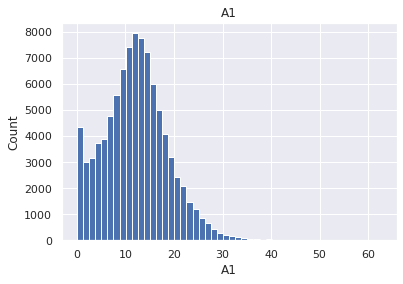

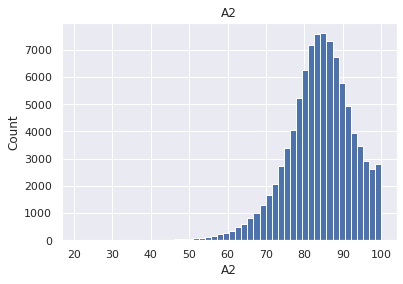

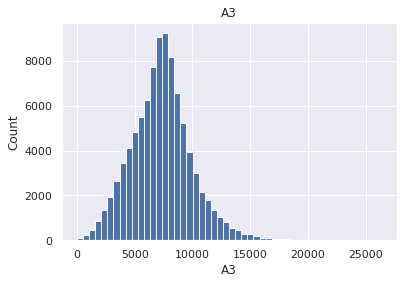

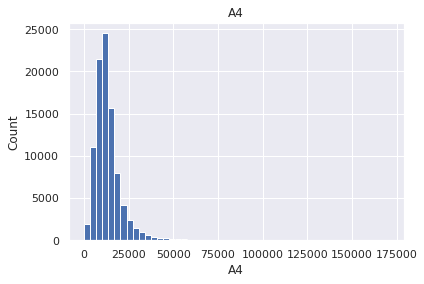

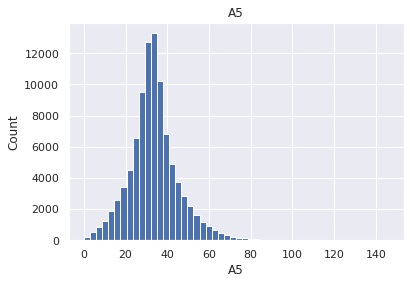

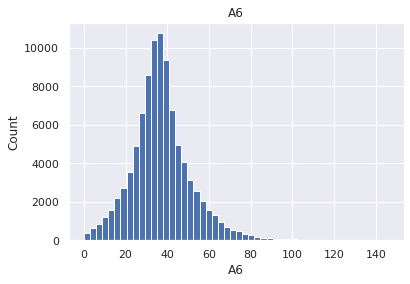

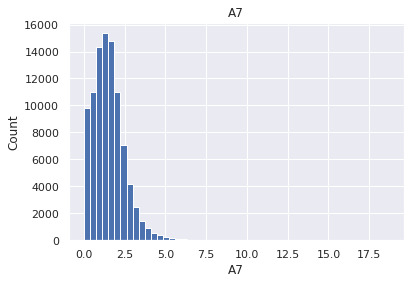

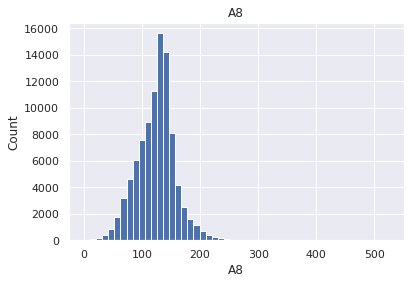

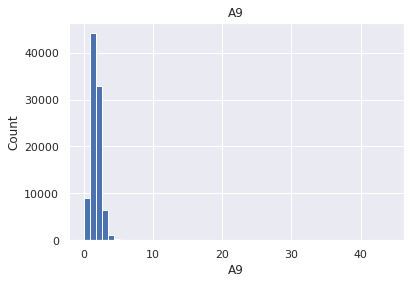

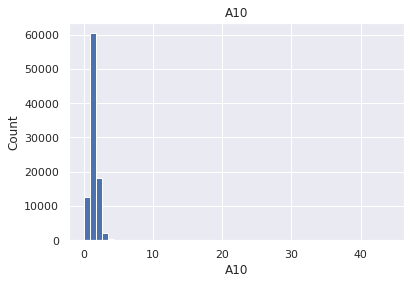

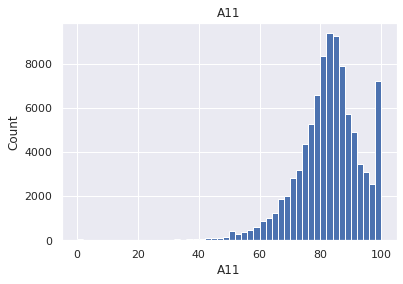

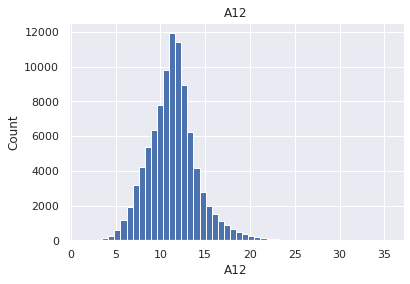

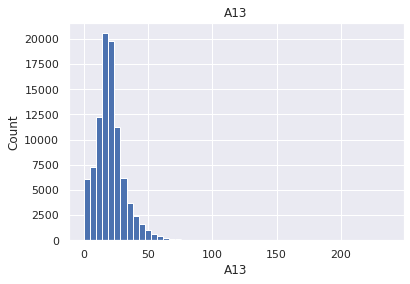

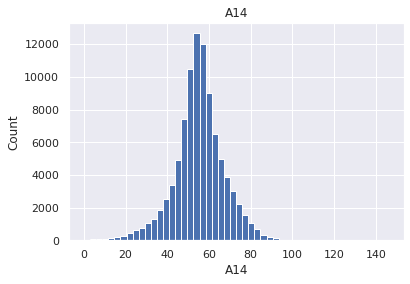

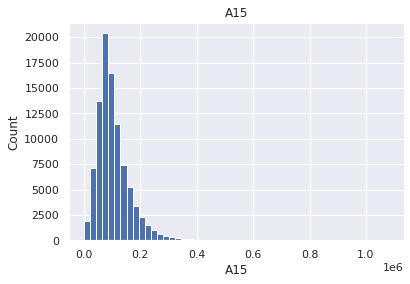

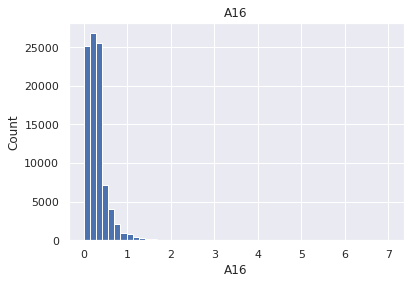

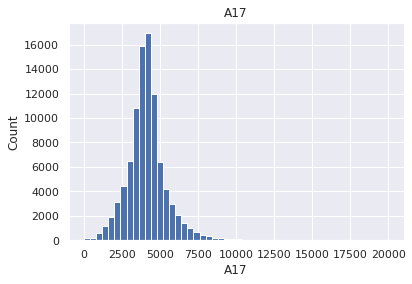

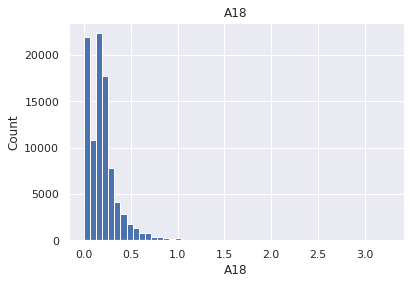

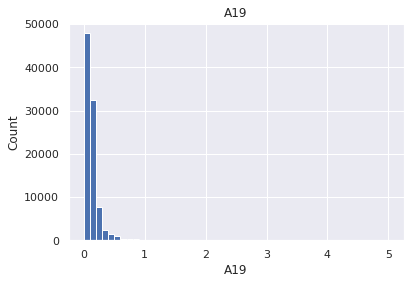

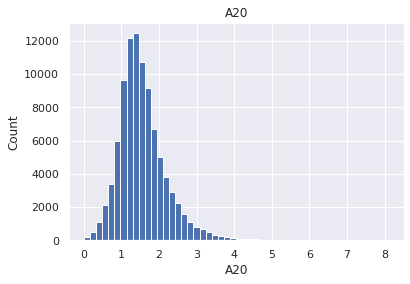

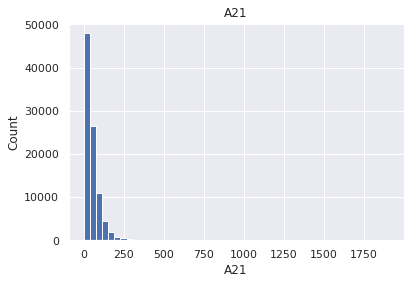

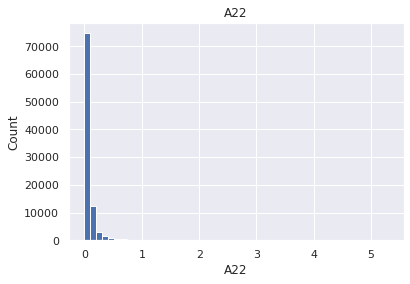

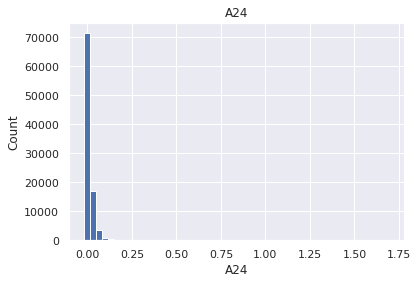

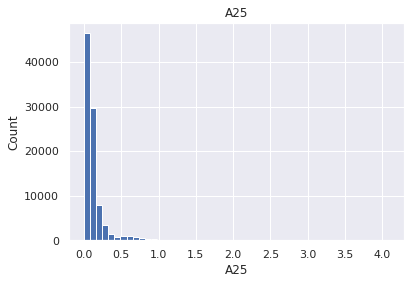

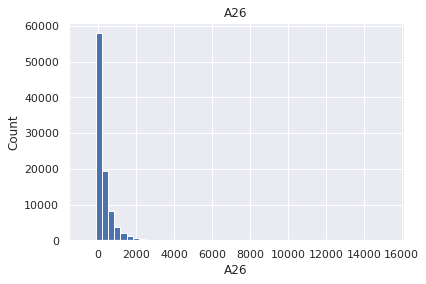

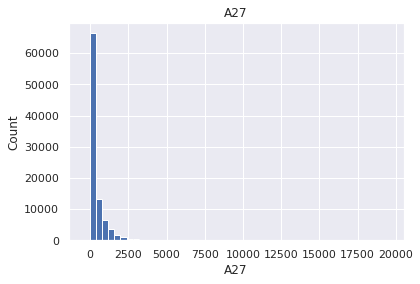

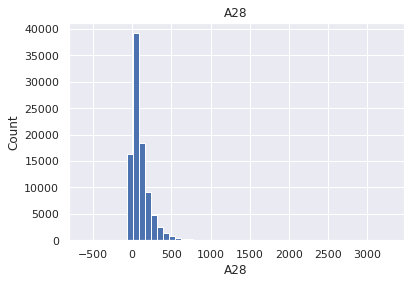

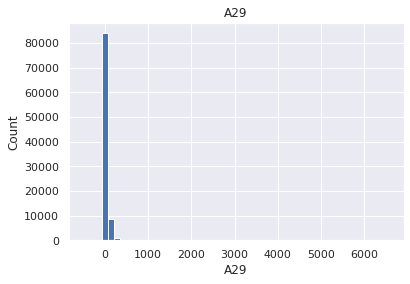

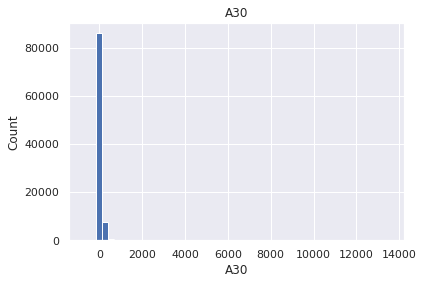

In [209]:
#Plotting features as histograms to check for distributions
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=50)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

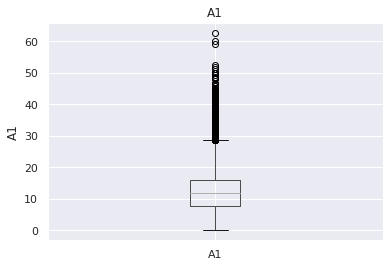

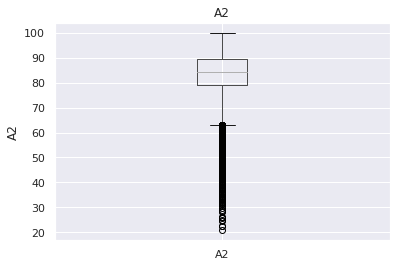

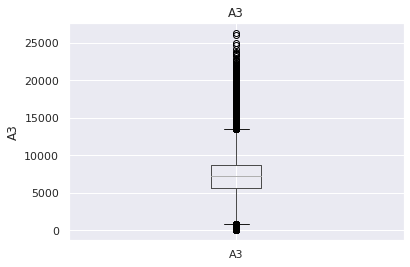

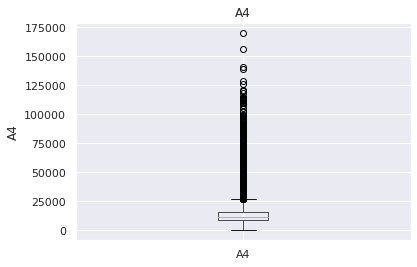

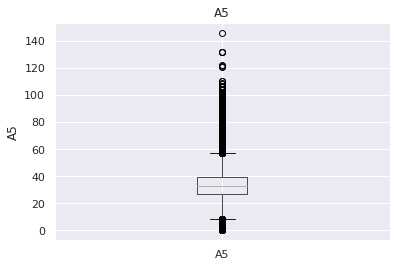

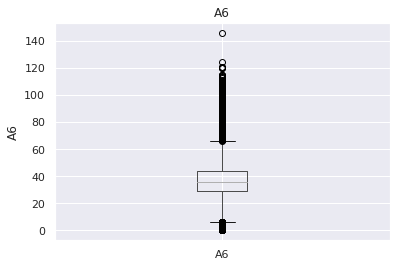

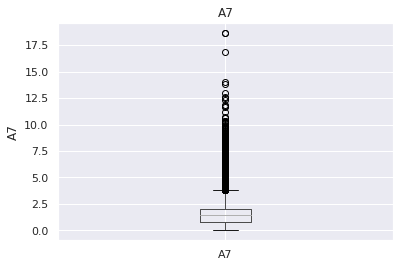

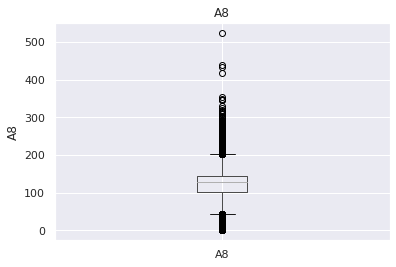

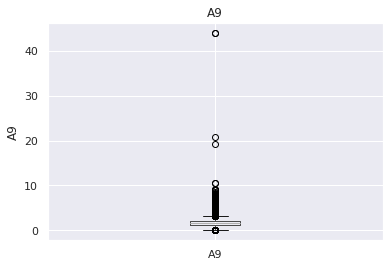

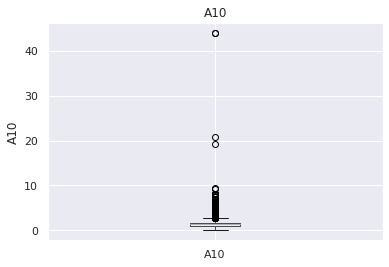

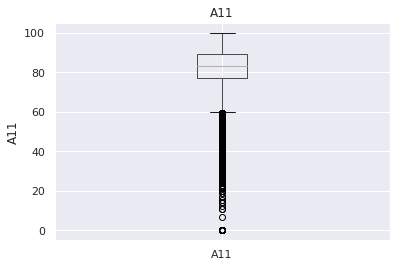

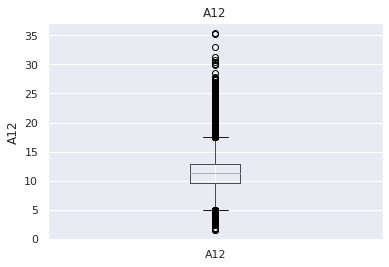

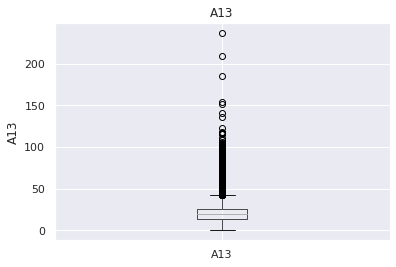

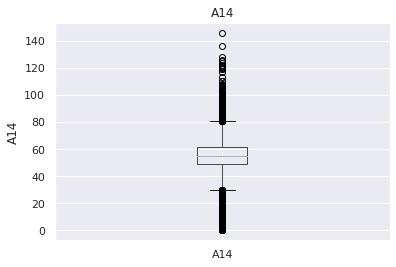

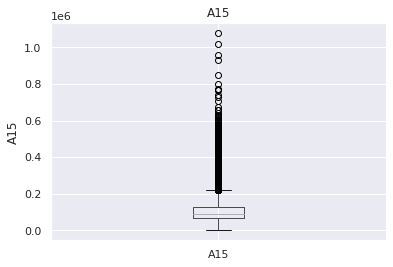

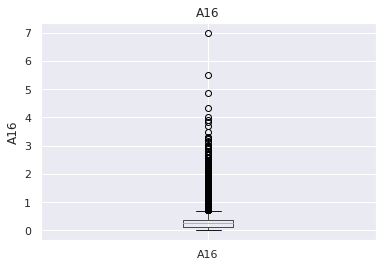

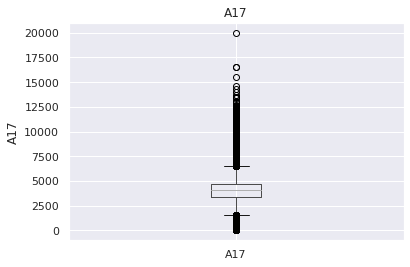

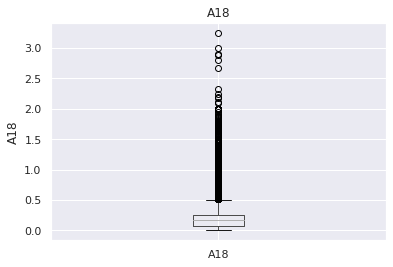

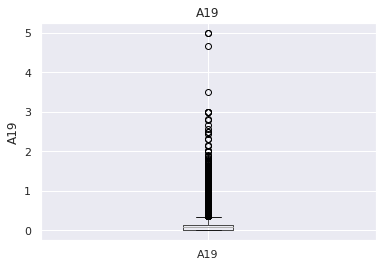

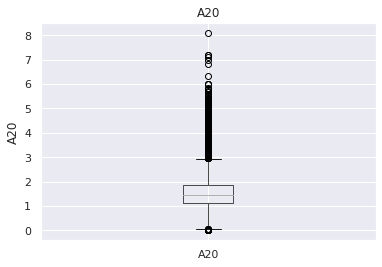

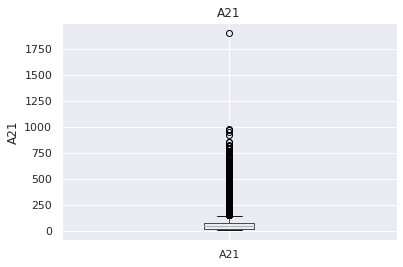

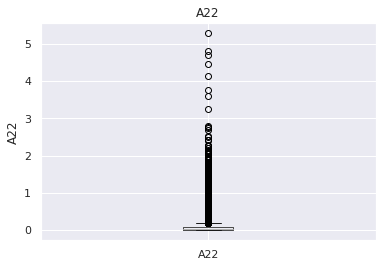

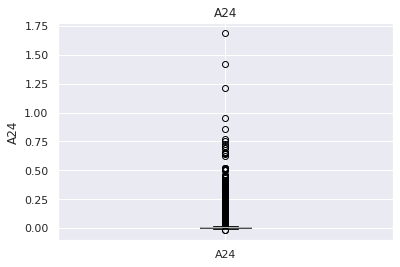

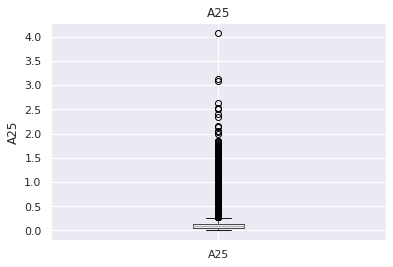

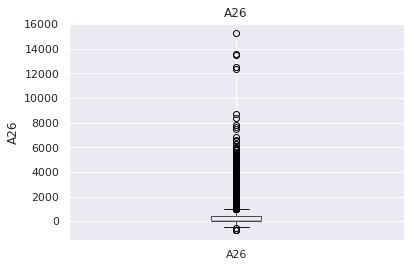

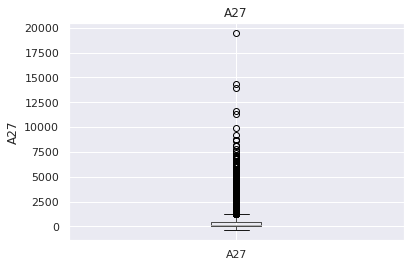

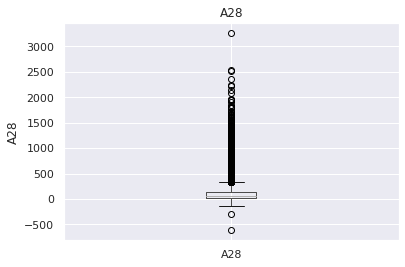

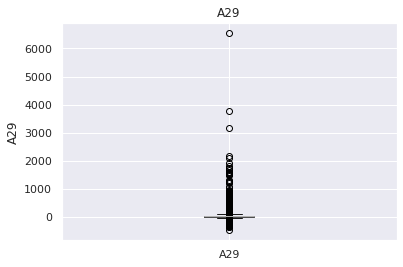

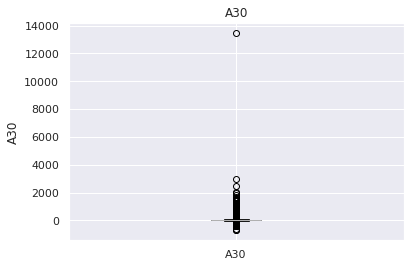

In [210]:
#Box plots to visualise quartiles and find outliers
for feature in continuous_feature:
    data=dataset.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [211]:
#Removing the outliers present in the data
df = train.copy()
df.drop(df.index[df['A1'] > 55], inplace=True)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93997 entries, 0 to 93999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       93997 non-null  float64
 1   A2       93997 non-null  float64
 2   A3       93997 non-null  float64
 3   A4       93997 non-null  float64
 4   A5       93997 non-null  float64
 5   A6       93997 non-null  float64
 6   A7       93997 non-null  float64
 7   A8       93997 non-null  float64
 8   A9       93997 non-null  float64
 9   A10      93997 non-null  float64
 10  A11      93997 non-null  float64
 11  A12      93997 non-null  float64
 12  A13      93997 non-null  float64
 13  A14      93997 non-null  float64
 14  A15      93997 non-null  float64
 15  A16      93997 non-null  float64
 16  A17      93997 non-null  float64
 17  A18      93997 non-null  float64
 18  A19      93997 non-null  float64
 19  A20      93997 non-null  float64
 20  A21      93997 non-null  int64  
 21  A22      939

In [213]:
#Class is not balanced, describes the imbalance ratio
train['default'].value_counts()/train.shape[0]

0    0.957447
1    0.042553
Name: default, dtype: float64

# **Feature Engineering**

In [214]:
# Checking for constant columns - Since none existed according to set threshold, no columns were dropped
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.2)
var_thres.fit(X)
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [215]:
#Checking the correlation of different features present
X = train.iloc[:,:]
corr_matrix = X.corr().abs()
corr_matrix

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
A1,1.000000,0.748951,0.471054,0.378873,0.492054,0.483082,0.526474,0.373436,0.331232,0.295327,0.484337,0.372810,0.398576,0.397312,0.303691,0.503393,0.278716,0.456614,0.385320,0.286464,0.009520,0.041449,0.005592,0.042981,0.039630,0.052968,0.036289,0.007522,0.018154,0.034801,0.224554
A2,0.748951,1.000000,0.517863,0.407799,0.482518,0.482486,0.618724,0.375246,0.410535,0.380494,0.770950,0.381769,0.395979,0.394871,0.377217,0.381696,0.292379,0.350420,0.298464,0.229001,0.003766,0.060587,0.019050,0.064202,0.038414,0.056671,0.030326,0.016198,0.022400,0.034842,0.214566
A3,0.471054,0.517863,1.000000,0.665712,0.515764,0.568834,0.445058,0.547352,0.526460,0.487397,0.419552,0.465938,0.445843,0.382244,0.541844,0.280378,0.363778,0.254478,0.235661,0.337238,0.006657,0.068615,0.022535,0.067817,0.012097,0.079143,0.032491,0.028643,0.029465,0.044163,0.173111
A4,0.378873,0.407799,0.665712,1.000000,0.315091,0.412735,0.379968,0.369470,0.493178,0.390337,0.318121,0.338775,0.343314,0.269608,0.583112,0.217860,0.337408,0.199547,0.185777,0.207659,0.042018,0.085139,0.039447,0.078386,0.024151,0.044232,0.052939,0.003614,0.013625,0.031632,0.123059
A5,0.492054,0.482518,0.515764,0.315091,1.000000,0.903871,0.391876,0.434256,0.294310,0.285118,0.372822,0.396888,0.704559,0.681524,0.185134,0.267639,0.254142,0.234799,0.221141,0.364923,0.006974,0.029200,0.009370,0.028006,0.020678,0.060580,0.037347,0.011727,0.009589,0.030253,0.180650
A6,0.483082,0.482486,0.568834,0.412735,0.903871,1.000000,0.401520,0.451374,0.335913,0.307062,0.370367,0.409220,0.599355,0.641190,0.231465,0.273023,0.261100,0.241083,0.223022,0.374750,0.010556,0.036536,0.004372,0.034941,0.020218,0.061436,0.041389,0.010940,0.008679,0.031773,0.178333
A7,0.526474,0.618724,0.445058,0.379968,0.391876,0.401520,1.000000,0.298279,0.344282,0.308982,0.481260,0.302859,0.341161,0.332789,0.363371,0.470803,0.249220,0.422848,0.371383,0.250110,0.037808,0.076212,0.031466,0.073371,0.028496,0.029096,0.048421,0.007466,0.001576,0.022805,0.166574
A8,0.373436,0.375246,0.547352,0.369470,0.434256,0.451374,0.298279,1.000000,0.287236,0.244410,0.301637,0.843509,0.343502,0.462648,0.115539,0.199455,0.229474,0.173153,0.173277,0.552098,0.004991,0.001955,0.024085,0.005212,0.007704,0.070861,0.009729,0.044007,0.037701,0.042242,0.150192
A9,0.331232,0.410535,0.526460,0.493178,0.294310,0.335913,0.344282,0.287236,1.000000,0.911302,0.335947,0.227930,0.297716,0.112229,0.554400,0.194024,0.299464,0.179986,0.162913,0.134941,0.008593,0.072741,0.039863,0.070636,0.033181,0.047023,0.013711,0.023007,0.029357,0.024106,0.132580
A10,0.295327,0.380494,0.487397,0.390337,0.285118,0.307062,0.308982,0.244410,0.911302,1.000000,0.315684,0.185088,0.270177,0.071449,0.534133,0.174595,0.273145,0.162724,0.146519,0.097198,0.000040,0.067156,0.039082,0.066107,0.050839,0.043492,0.005433,0.024532,0.026497,0.020610,0.125432


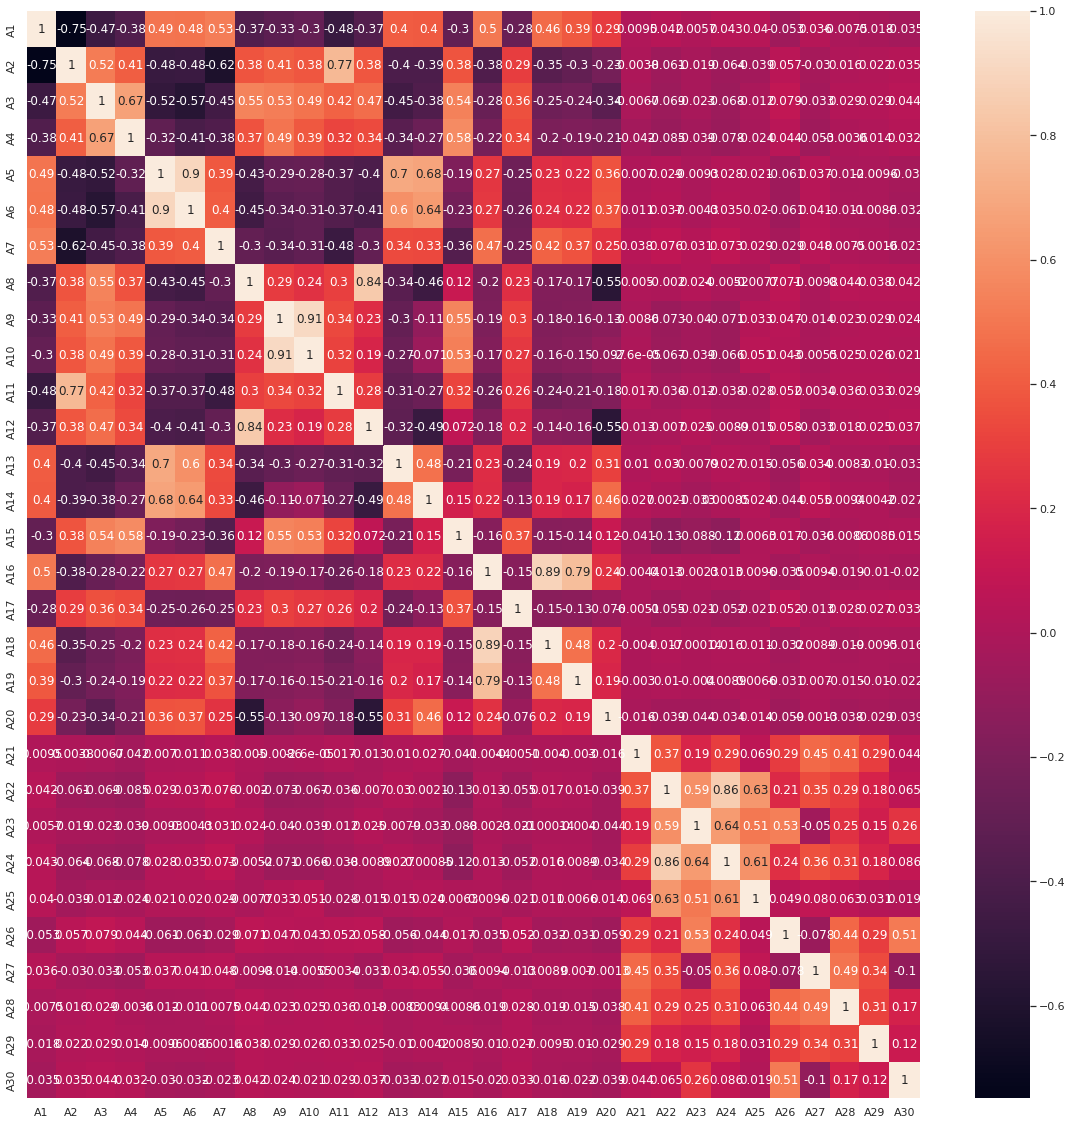

In [216]:
# Plotting heat-map for the correlation matriz
corr=X.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [217]:
# Find features with correlation greater than 0.9
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print('Columns to be dropped:',to_drop)

Columns to be dropped: ['A6', 'A10']


In [218]:
# Drop Features with correlation greater than 0.9
train = train.drop(['A6', 'A10'], axis=1)
val = val.drop(['A6', 'A10'], axis=1)

In [219]:
# Finding relevant features based on the values of Information gain
from sklearn.feature_selection import SelectKBest

In [220]:
ordered_rank_features=SelectKBest(k=28)
ordered_feature=ordered_rank_features.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [221]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(train.columns)

In [222]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [223]:
features_rank.columns=['Features','Score']

In [155]:
# Ranked the features based on the scores
features_rank.nlargest(28,'Score')

,Features,Score
0,A1,4991.490853
1,A2,4536.403374
4,A5,3171.043651
2,A3,2903.908408
5,A7,2682.580609
8,A11,2451.700776
10,A13,2179.518384
6,A8,2169.313993
13,A16,1817.272934
7,A9,1681.805441


In [224]:
# Initialising numpy arrays for target variable (y) and independent features (X)
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
val_X = val.iloc[:, :-1].values
val_y = val.iloc[:, -1].values

In [227]:
# Feature Importance
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)

In [228]:
# Comparing different features informations gains
C = train.iloc[:,:-1]
mutual_data=pd.Series(mutual_info,index=C.columns)
mutual_data.sort_values(ascending=False)

A1     0.026792
A2     0.021421
A3     0.018758
A4     0.017596
A5     0.017471
A7     0.014014
A8     0.013907
A13    0.013752
A9     0.013720
A11    0.013401
A15    0.013361
A14    0.010753
A17    0.010585
A16    0.009853
A12    0.009647
A19    0.008713
A18    0.008234
A20    0.005591
A22    0.000879
A25    0.000770
A24    0.000768
A21    0.000615
A30    0.000568
A26    0.000425
A23    0.000338
A28    0.000207
A29    0.000129
A27    0.000000
dtype: float64

In [229]:
new_train = train.drop(['A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30'], axis=1)

In [230]:
new_train.head()

,A1,A2,A3,A4,A5,A7,A8,A9,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,default
0,10.69,86.10,8920.16,19912.85,30.42,1.18,145.41,2.236,84.29,13.46,16.01,52.18,123101.84,0.23,4305.85,0.15,0.09,1.09,0
1,28.50,65.19,6564.00,6716.67,32.50,2.74,91.11,1.000,59.80,8.18,29.33,63.55,34275.73,0.80,3616.67,0.78,0.14,1.67,0
2,24.87,73.79,4285.47,6463.75,40.50,2.84,93.90,2.400,77.17,10.25,39.92,61.95,84841.79,0.78,2301.54,0.62,0.15,2.80,0
3,13.64,85.82,6887.56,9244.44,49.56,0.36,171.45,1.875,95.88,15.38,49.80,67.22,145261.11,0.09,3419.60,0.09,0.00,1.00,0
4,4.50,95.92,8746.50,19987.50,32.75,0.92,153.25,2.000,94.55,11.87,17.43,50.70,120522.80,0.17,3828.57,0.08,0.00,2.69,0


In [231]:
new_val = val.drop(['A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30'], axis=1)

In [232]:
new_val.head()

,A1,A2,A3,A4,A5,A7,A8,A9,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,default
0,22.88,75.59,3367.08,6131.31,41.38,2.13,102.67,0.500,75.85,9.48,22.22,58.46,42131.54,0.65,4005.22,0.33,0.33,1.25,1
1,15.94,86.26,5595.00,10867.86,52.29,3.05,124.94,3.200,75.00,11.72,15.73,63.36,148530.21,0.33,2281.82,0.38,0.00,2.37,1
2,25.16,64.20,4758.44,7818.15,46.28,2.69,110.16,1.124,62.57,10.53,32.24,62.83,39652.58,0.55,3050.54,0.36,0.25,1.51,1
3,19.50,77.81,5762.27,6290.00,58.14,2.44,119.92,1.222,82.50,9.65,48.73,66.29,86341.79,0.50,4169.09,0.31,0.27,2.69,1
4,11.11,85.09,11400.50,20936.25,30.00,0.50,125.89,2.167,95.86,10.35,37.20,63.30,224497.30,0.00,8970.00,0.00,0.00,1.25,1


In [23]:
'''# Initialising numpy arrays for target variable (y) and independent features (X)
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
val_X = val.iloc[:, :-1].values
val_y = val.iloc[:, -1].values'''

# **Model Training**

In [234]:
X = new_train.iloc[:, :-1].values
y = new_train.iloc[:, -1].values
val_X = new_val.iloc[:, :-1].values
val_y = new_val.iloc[:, -1].values

In [235]:
X.shape

(94000, 18)

In [237]:
val_X.shape

(11500, 18)

In [238]:
# Performing standardisation on numerical data columns before logistic regression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
val_X = sc.transform(val_X)

In [241]:
# Implementing Logistic Regression with class weights
w = {0:1, 1:4.5}
# define model
lr = LogisticRegression(random_state=13, class_weight=w)
lr.fit(X,y)
'''
LogisticRegression(C=1.0, class_weight={0: 1, 1: 4.5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=13, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
'''

"\nLogisticRegression(C=1.0, class_weight={0: 1, 1: 4.5}, dual=False,\n                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,\n                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',\n                   random_state=13, solver='lbfgs', tol=0.0001, verbose=0,\n                   warm_start=False)\n"

In [242]:
# Confusion matrix on Logistic Regression (with Class Weights)
# Giving better results since the output class was imbalanced
from sklearn.metrics import confusion_matrix, accuracy_score
lr_y_pred = lr.predict(val_X)
cm = confusion_matrix(val_y, lr_y_pred)
print(cm)
accuracy_score(val_y, lr_y_pred)

[[9765  235]
 [1062  438]]


0.8872173913043478

In [264]:
# Tuning the Logistic Regression Model with different parameters
from sklearn.model_selection import RandomizedSearchCV

w = [{0:1.0,1:4.7}, {0:1.0,1:4.6}, {0:1.0,1:4.4}, {0:1.0,1:4.3}, 
     {0:1.0,1:4.8}, {0:1.0,1:4.5},{0:1.0,1:4.2},{0:1.0,1:4}, 
     {0:1.0,1:3}, {0:10,1:2},{0:100,1:1} ]

params = {
    'C': [0.001, 0.01, 0.1, 0.3, 0.7, 1, 2, 4, 7],
    'class_weight': w,
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(0,1000,100)),
    'solver': ['liblinear','lbfgs','newton-cg'],
    'C' : [1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'verbose' : [0,1,2,3,4,5]
}
lr_search = RandomizedSearchCV(estimator = lr, 
                            param_distributions=params, 
                            cv=10,
                            random_state=13, 
                            n_jobs=-1)
lr_search.fit(X, y)

[LibLinear]

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0,
                                                class_weight={0: 1, 1: 4.5},
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=13,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={...
                                                         {0: 1.0, 1: 4.4},
                                                         {0: 1.0, 1: 4.3},
                                

In [265]:
# Finding best parameters after hypertuning the model
lr_search.best_estimator_

LogisticRegression(C=100, class_weight={0: 1.0, 1: 4.3}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=900, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=13, solver='liblinear', tol=0.0001, verbose=4,
                   warm_start=False)

In [266]:
# Training the model on tuned parameters
lr_tuned = LogisticRegression(C=100, class_weight={0: 1.0, 1: 4.3}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=900, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=13, solver='liblinear', tol=0.0001, verbose=4,
                   warm_start=False)
lr_tuned.fit(X,y)

[LibLinear]

LogisticRegression(C=100, class_weight={0: 1.0, 1: 4.3}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=900, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=13, solver='liblinear', tol=0.0001, verbose=4,
                   warm_start=False)

In [267]:
# Calculate the confusion matrix for tuned model
tuned_lr_y_pred = lr_tuned.predict(val_X)
cm = confusion_matrix(val_y, tuned_lr_y_pred)
print(cm)
accuracy_score(val_y, tuned_lr_y_pred)

[[9785  215]
 [1085  415]]


0.8869565217391304

In [268]:
# Implementing XGB Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [269]:
# Calculate the confusion matrix
xgb_y_pred = xgb.predict(val_X)
cm = confusion_matrix(val_y, xgb_y_pred)
print(cm)
accuracy_score(val_y, xgb_y_pred)

[[9991    9]
 [1473   27]]


0.8711304347826087

In [272]:
# Implementing Hypertuning on XGB Classifier
from sklearn.model_selection import RandomizedSearchCV

params={'n_estimators' : [10,20,40,100,300],
       'max_depth': [3,4,5,7,10,14,18,25],
       'learning_rate': [0.05, 0.1, 0.15, 0.25, 0.30],
       'gamma' : [0.0,0.1,0.2,0.3,0.4,0.5],
       'min_child_weight' : [1,2,4,7,9,10]}

xgb_search = RandomizedSearchCV(estimator = xgb, 
                            param_distributions=params, 
                            random_state=13, 
                            n_iter=5, 
                            cv=10,
                            verbose=3,
                            n_jobs=-1)
xgb_search.fit(X, y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 10.3min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [273]:
# Finding best parameters after hypertuning the model
xgb_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=9, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [274]:
# Training the model on tuned parameters
xgb_tuned = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=9, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb_tuned.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=9, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [275]:
# Calculate the confusion matrix
tuned_xgb_y_pred = xgb_tuned.predict(val_X)
cm = confusion_matrix(val_y, tuned_xgb_y_pred)
print(cm)
accuracy_score(val_y, tuned_xgb_y_pred)

[[9998    2]
 [1496    4]]


0.8697391304347826

In [293]:
results1 = pd.DataFrame(tuned_lr_y_pred)

In [294]:
results1.to_csv('results1.csv',index=False)

In [295]:
results2 = pd.DataFrame(tuned_xgb_y_pred)

In [296]:
results2.to_csv('results2.csv',index=False)